In [9]:
import numpy as np
import pandas as pd
import pickle
import os

from create_sequences import create_sequences
from tqdm import tqdm
from generate_multivariate_samples import generate_multivariate_samples

import numpy as np
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import itertools

In [10]:
df_all = pd.read_csv('eua_price_data.csv', thousands=',') 
df_all['Date'] = pd.to_datetime(df_all['Date'], format='%Y-%m-%d')  
df_all = df_all.sort_values(by = 'Date', ascending=True).reset_index(drop = True)
df_all = df_all[(df_all['Date'] > pd.to_datetime('2020-11-24')) & (df_all['Date'] < pd.to_datetime('2024-10-07'))].reset_index(drop=True)

<Axes: xlabel='Date'>

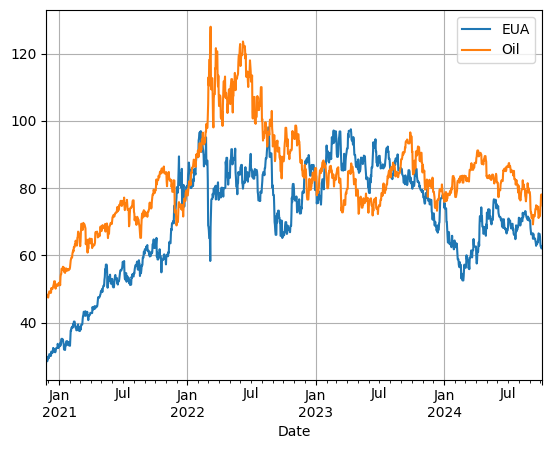

In [31]:
df_all.plot(kind='line', x = 'Date', y = ['EUA', 'Oil'], grid ='on')


In [12]:
from correlogram import plot_autocorrelogram, plot_cross_correlogram

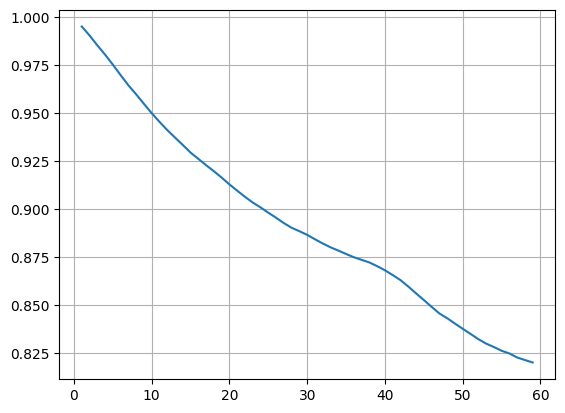

In [28]:
col = 'EUA'
auto_corr = []
for lag in range(1,60):
    tail = []
    head = []
    for i in range(len(df_all)-lag):
        head.append(df_all.loc[i    , col])
        tail.append(df_all.loc[i+lag, col])
    auto_corr.append(np.corrcoef(head, tail)[0][1])
plt.plot(range(1,60), auto_corr)
plt.grid('on')

Text(0.5, 1.0, '-0.47739033658299235')

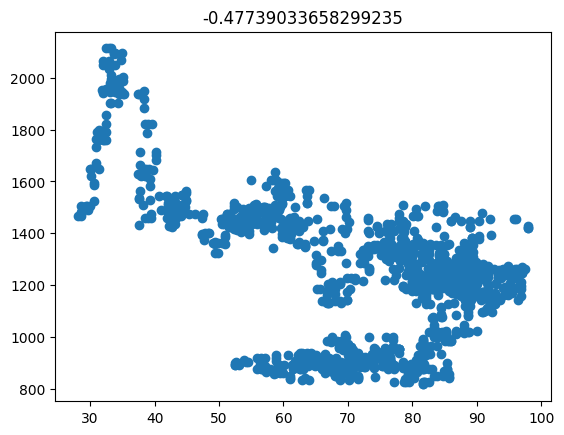

In [53]:
lag = 10
col1 = 'EUA'
col2 = 'S&P_clean'
tail = []
head = []
for i in range(len(df_all)-lag):
    head.append(df_all.loc[i    , col1])
    tail.append(df_all.loc[i+lag, col2])
plt.scatter(head, tail,)
plt.title(np.corrcoef(head, tail)[0][1])

In [65]:
def Compute_cross_correlation(df_all:pd.DataFrame,
                              col1:str,
                              col2:str,
                              total_lag: int = 60,
                              visual_output: bool = True, 
                              return_corr: bool = True)->np.ndarray:
    """_summary_

    Args:
        df_all (pd.DataFrame): _description_ 
        col1 (str): _description_
        col2 (str): _description_
        total_lag (int, optional): _description_. Defaults to 60.
        visual_output (bool, optional): _description_. Defaults to True.
        return_corr (bool, optional): _description_. Defaults to True.

    Returns:
        np.ndarray: _description_
    """
    col1 = 'EUA'
    col2 = 'Oil'
    corss_corr = []
    for lag in range(1,total_lag):
        tail = []
        head = []
        for i in range(len(df_all)-lag):
            head.append(df_all.loc[i    , col1])
            tail.append(df_all.loc[i+lag, col2])
        corss_corr.append(np.corrcoef(head, tail)[0][1])
    if visual_output:
        plt.plot(range(1,60), corss_corr)
        plt.grid('on')
    if return_corr:
        return np.array(corss_corr)

Index(['Date', 'EUA', 'Market_size', 'Oil', 'Coal', 'NG', 'Power', 'IR', 'GDP',
       'USEU', 'S&P_clean', 'DAX'],
      dtype='object')

In [ ]:
# enumerate, list comprehension, plt.subplot

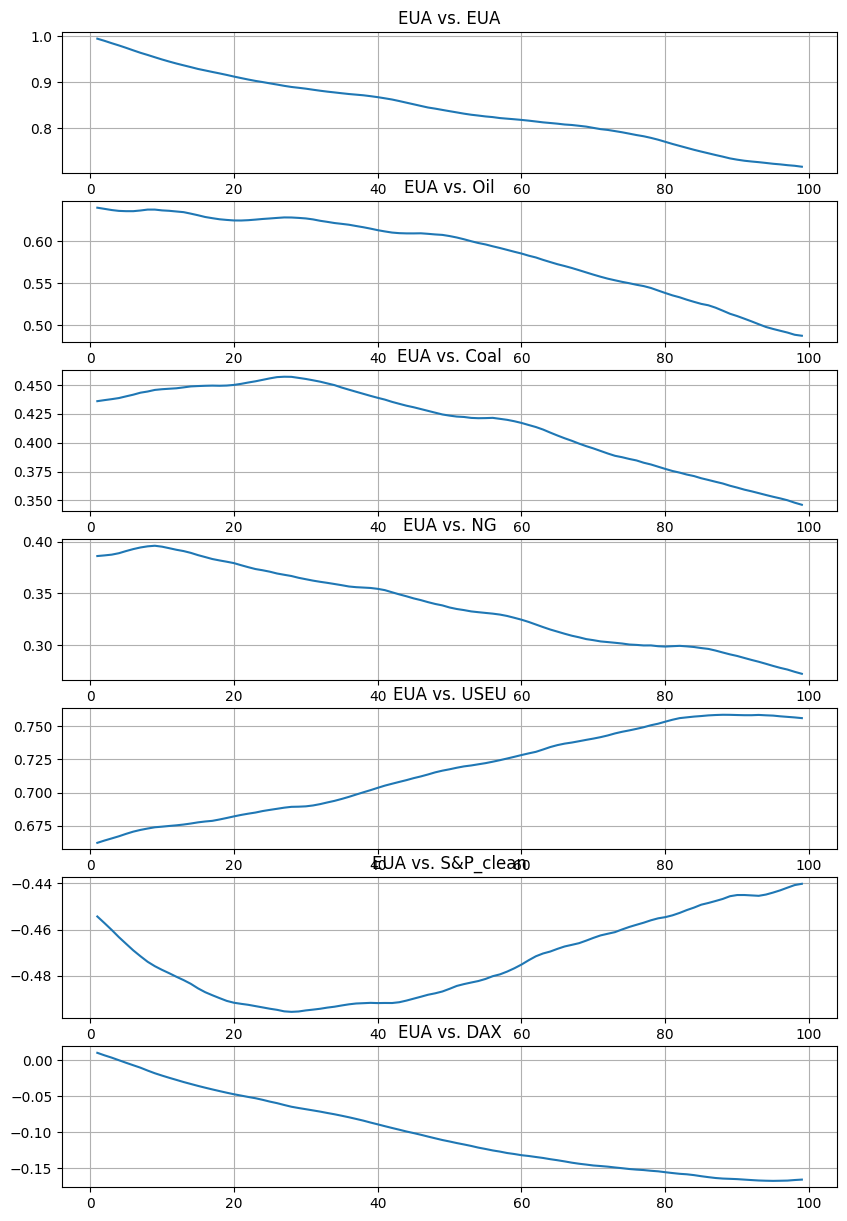

In [56]:
col1 = 'EUA'
col2_lst = ['EUA',  'Oil', 'Coal', 'NG', 'USEU', 'S&P_clean', 'DAX']
total_lag = 100
plt.figure(figsize = (10,15))
for j, col2 in enumerate(col2_lst):
    corss_corr = []
    for lag in range(1,total_lag):
        tail = []
        head = []
        for i in range(len(df_all)-lag):
            head.append(df_all.loc[i    , col1])
            tail.append(df_all.loc[i+lag, col2])
        corss_corr.append(np.corrcoef(head, tail)[0][1])
    plt.subplot(len(col2_lst), 1, j+1)
    plt.plot(range(1,total_lag), corss_corr)
    plt.title(f'{col1} vs. {col2}')
    plt.grid('on')

<Axes: >

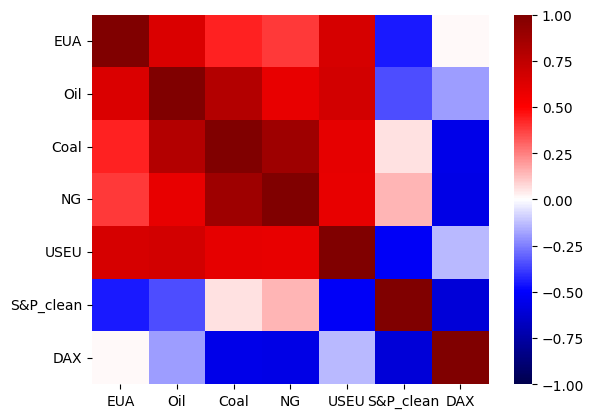

In [47]:
import seaborn as sns
sns.heatmap(df_all[col2_lst].corr(), cmap = 'seismic', vmin = -1, vmax =1)

In [ ]:

def plot_cross_correlograms(var1, df_all, lags=20):
    num_rows = 
    # Calculate the cross-correlation
    cross_corr = [data1.corr(data2.shift(lag)) for lag in range(-lags, lags + 1)]

    # Create the plot
    plt.bar(range(-lags, lags + 1), cross_corr, color='green', alpha=0.6)
    if title == None:
        plt.title('Cross Correlogram')
    else:
        plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axhline(1.96/np.sqrt(len(data1)), color='red', linestyle='--', label='95% CI')
    plt.axhline(-1.96/np.sqrt(len(data1)), color='red', linestyle='--')
    # plt.xticks(range(-lags, lags + 1))
    plt.legend()
    plt.grid()
    plt.show()
    


SyntaxError: invalid syntax (2186688195.py, line 2)

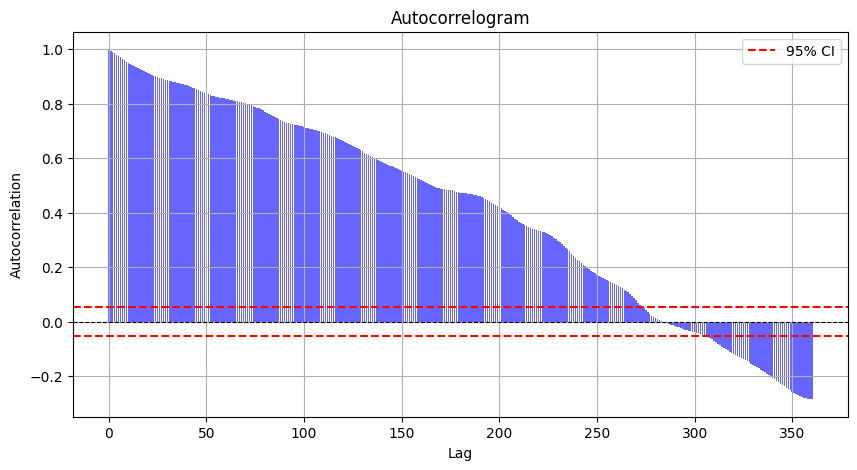

In [26]:
plot_autocorrelogram(df_all['EUA'], 360)

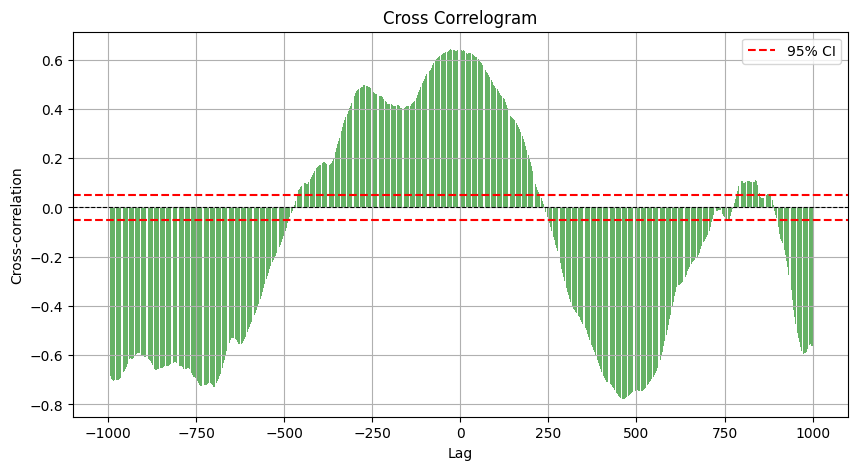

In [6]:
plot_cross_correlogram(df_all['Oil'], df_all['EUA'], lags = 1000)

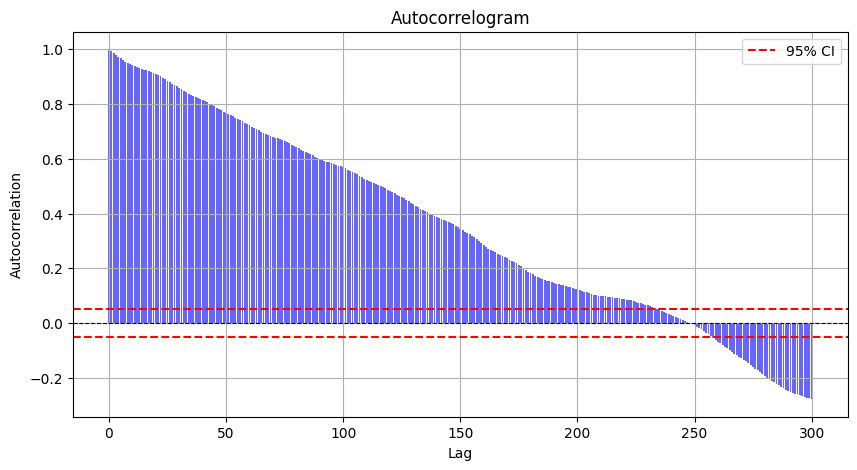

In [7]:
plot_autocorrelogram(df_all['Oil'], lags = 300)